In [152]:
import pandas as pd
import numpy as np
import ast
import datetime as dt
import matplotlib.pyplot as plt
import csv
import pyodbc

In [153]:
conx = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                      'SERVER=tcp:anlnmfptu.database.windows.net,1433;'
                      'Database=anime;'
                      'UID=anlnmfptu;'
                      'PwD=Abc@12345;Encrypt=yes;TrustServerCertific')

In [159]:
data = pd.read_csv('animes.csv')
data

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [154]:
# data = pd.read_csv('animes.csv')
# data = pd.read_csv('animes.csv')


df = data.copy()
aTuple = []
for index,i in enumerate(df['aired']): 
    try:
        try:
            # print(f'From: {dt.datetime.strptime(i.split("to")[0].strip(),"%b %d, %Y")}, End {dt.datetime.strptime(i.split("to")[1].strip(),"%b %d, %Y")}')
            aTuple.append((dt.datetime.strptime(i.split("to")[0].strip(),"%b %d, %Y"), dt.datetime.strptime(i.split("to")[1].strip(),"%b %d, %Y")))
        except:
            try:
                # print(f'From: {dt.datetime.strptime(i.split("to")[0].strip(),"%b %d, %Y")}, End {np.nan}')
                aTuple.append((dt.datetime.strptime(i.split("to")[0].strip(),"%b %d, %Y"), np.nan))
            except:
                try:
                    # print(f'From: {dt.datetime.strptime(i.split("to")[0].strip(),"%b, %Y")}, End {np.nan}')
                    aTuple.append((dt.datetime.strptime(i.split("to")[0].strip(),"%b, %Y"), np.nan))
                except:
                    # print(f'From: {dt.datetime.strptime(i.split("to")[0].strip(),"%Y")}, End {np.nan}')
                    aTuple.append((dt.datetime.strptime(i.split("to")[0].strip(),"%Y"), np.nan))
                    
    except:
        # print(f'From: {np.nan}, End {np.nan}')
        aTuple.append((np.nan, np.nan))
df.insert(5, 'aired from', [pd.to_datetime(x[0]) for x in aTuple])
df.insert(6, 'aired to', [pd.to_datetime(x[1]) for x in aTuple])
df.drop('aired', axis=1, inplace=True)
df['aired from'] = pd.to_datetime(df['aired from'])
df['aired to'] = pd.to_datetime(df['aired to'])


# df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x))
# match = {
#     'Action': 0,
#     'Adventure': 1,
#     'Cars': 2,
#     'Comedy': 3,
#     'Dementia': 4,
#     'Demons': 5,
#     'Drama': 6,
#     'Ecchi': 7,
#     'Fantasy': 8,
#     'Game': 9,
#     'Harem': 10,
#     'Hentai': 11,
#     'Historical': 12,
#     'Horror': 13,
#     'Josei': 14,
#     'Kids': 15,
#     'Magic': 16,
#     'Martial Arts': 17,
#     'Mecha': 18,
#     'Military': 19,
#     'Music': 20,
#     'Mystery': 21,
#     'Parody': 22,
#     'Police': 23,
#     'Psychological': 24,
#     'Romance': 25,
#     'Samurai': 26,
#     'School': 27,
#     'Sci-Fi': 28,
#     'Seinen': 29,
#     'Shoujo': 30,
#     'Shoujo Ai': 31,
#     'Shounen': 32,
#     'Shounen Ai': 33,
#     'Slice of Life': 34,
#     'Space': 35,
#     'Sports': 36,
#     'Super Power': 37,
#     'Supernatural': 38,
#     'Thriller': 39,
#     'Vampire': 40,
#     'Yaoi': 41,
#     'Yuri': 42
# }
# # for i in df['genre']:
# #     for j in i:
# #         gen_table.add(j)
# ls = []
# for i in range(len(match)):
#     ls.append(i)
# gern_detail = set()
# for row in df.itertuples():
#     for j in row.genre:
#         gern_detail.add((row.uid, match[j]))
# pd.DataFrame(gern_detail, columns=['uid', 'genre_id']).to_csv('genre_detail.csv', index=False)
# match.items()
# genre = pd.DataFrame(list(match.items()), columns=['genre', 'genre_id'])
# genre.to_csv('genre.csv', index=False)
# df.drop('genre', axis=1, inplace=True)
# df.drop('synopsis',axis=1,inplace=True)
# df.drop('img_url',axis=1,inplace=True)
# df.drop('link',axis=1,inplace=True)
# df.to_csv("MyloveAnime.csv", index=False)
df = pd.read_sql_query('''SELECT COUNT(*) AS TotalGenreDetails 
FROM [dbo].[genre_detail]
''', conx) #type: ignore
a = df['TotalGenreDetails'][0]
df = pd.read_sql_query('''SELECT COUNT(*) AS TotalAnimeRecords FROM dbo.MyloveAnime
''', conx) #type: ignore
b = df['TotalAnimeRecords'][0]
df = pd.read_sql_query('''SELECT count(*) as count
  FROM [dbo].[gerne]''', conx) #type: ignore
c = df['count'][0]
df = pd.read_sql_query('SELECT FLOOR(YEAR(A.aired_from)/10) AS YEAR,Count(*) AS COUNT FROM MyloveAnime A GROUP BY FLOOR(YEAR(A.aired_from)/10) ORDER BY FLOOR(YEAR(A.aired_from)/10)', conx)
df.drop(0,inplace=True)
df.drop(12,inplace=True)
df1 = pd.read_sql_query('''SELECT TOP 10 title, popularity
FROM dbo.MyloveAnime
ORDER BY popularity''', conx) #type: ignore
df2 = pd.read_sql_query('''SELECT TOP 10 title, score
FROM dbo.MyloveAnime
ORDER BY score DESC''', conx) #type: ignore
df3 = pd.read_sql_query('''SELECT TOP 10 episodes, AVG(score) AS AverageScore
FROM dbo.MyloveAnime
WHERE episodes IS NOT NULL
GROUP BY episodes
ORDER BY AverageScore
''', conx) #type: ignore
df4 = pd.read_sql_query('''SELECT g.genre, COUNT(ma.uid) AS AnimeCount
FROM dbo.gerne g
LEFT JOIN [dbo].[genre_detail] gd ON g.genre_id = gd.genre_id
LEFT JOIN dbo.MyloveAnime ma ON gd.uid = ma.uid
GROUP BY g.genre
ORDER BY AnimeCount DESC
OFFSET 0 ROWS FETCH NEXT 20 ROWS ONLY
''', conx) #type: ignore
df5 = pd.read_sql_query('''SELECT g.genre, COUNT(ma.uid) AS AnimeCount
FROM dbo.gerne g
LEFT JOIN dbo.genre_detail gd ON g.genre_id = gd.genre_id
LEFT JOIN dbo.MyloveAnime ma ON gd.uid = ma.uid
GROUP BY g.genre
ORDER BY COUNT(ma.uid) DESC
''', conx) #type: ignore
df6 = pd.read_sql_query('''SELECT
    'Less than 10 episodes' AS EpisodeRange,
    COUNT(*) AS Count
FROM dbo.MyloveAnime
WHERE episodes < 100
UNION ALL
SELECT
    '10-20 episodes' AS EpisodeRange,
    COUNT(*) AS Count
FROM dbo.MyloveAnime
WHERE episodes >= 100 AND episodes <= 200
UNION ALL
SELECT
    'More than 20 episodes' AS EpisodeRange,
    COUNT(*) AS Count
FROM dbo.MyloveAnime
WHERE episodes > 20
''', conx) #type: ignore
df7 = pd.read_sql_query('''SELECT TOP 10 g.genre, SUM(ma.popularity) AS TotalPopularity
FROM dbo.gerne g
LEFT JOIN dbo.genre_detail gd ON g.genre_id = gd.genre_id
LEFT JOIN dbo.MyloveAnime ma ON gd.uid = ma.uid
GROUP BY g.genre
ORDER BY TotalPopularity DESC
''', conx) #type: ignore
df8 = pd.read_sql_query('''SELECT TOP 10 g.genre, AVG(ma.score) AS AverageScore
FROM dbo.gerne g
LEFT JOIN dbo.genre_detail gd ON g.genre_id = gd.genre_id
LEFT JOIN dbo.MyloveAnime ma ON gd.uid = ma.uid
GROUP BY g.genre
ORDER BY AverageScore DESC
''', conx) #type: ignore


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19772\1063400707.py:95: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('''SELECT COUNT(*) AS TotalGenreDetails
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19772\1063400707.py:99: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('''SELECT COUNT(*) AS TotalAnimeRecords FROM dbo.MyloveAnime
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19772\1063400707.py:102: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('''SELECT count(*) 

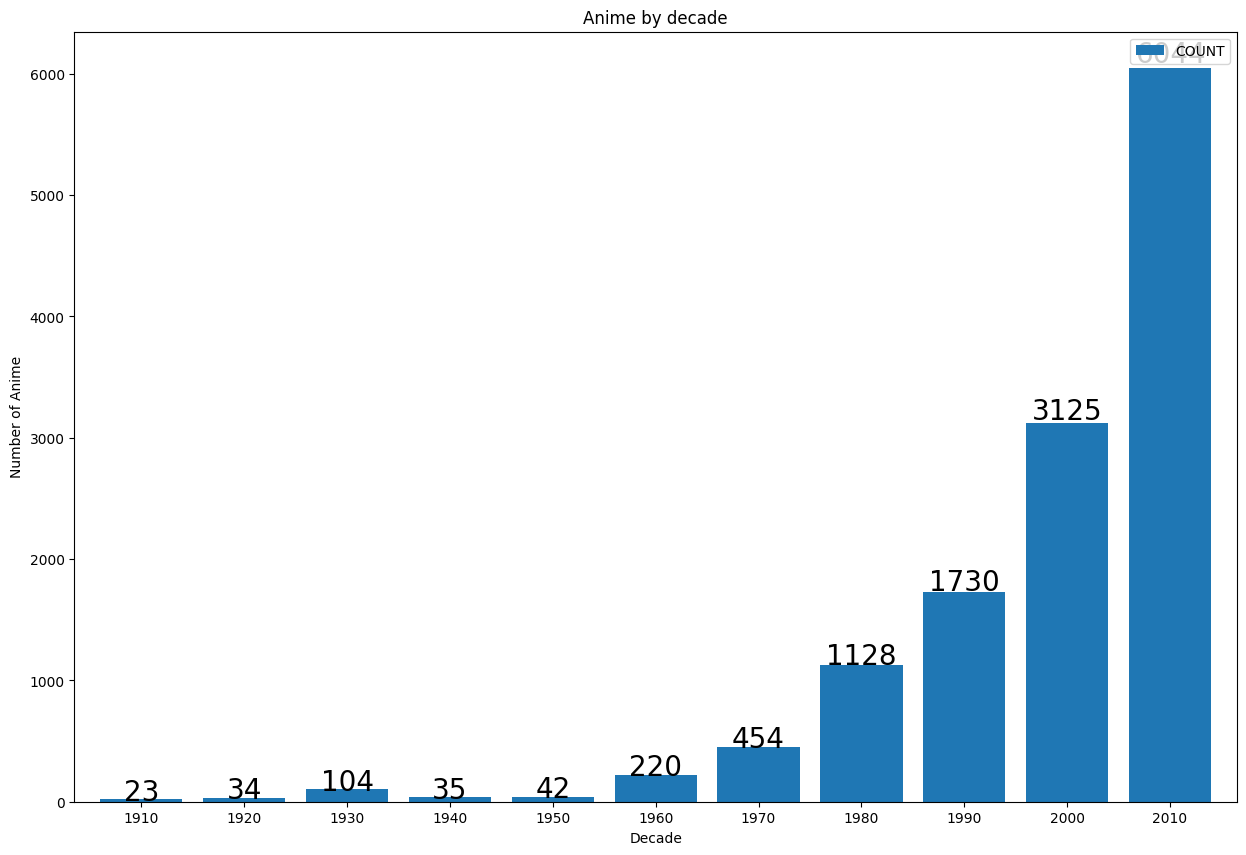

In [108]:
for i in df['YEAR']:
    df['YEAR'] = df['YEAR'].replace(i,str(i*10)[:-2])
df['YEAR'] = df['YEAR'].astype(int)
ax = df.plot(kind='bar', x='YEAR', y='COUNT', rot=0, figsize=(15,10), width=0.8)
plt.title('Anime by decade')
plt.xlabel('Decade')
plt.ylabel('Number of Anime')
plt.set_cmap('Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()*1.01),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

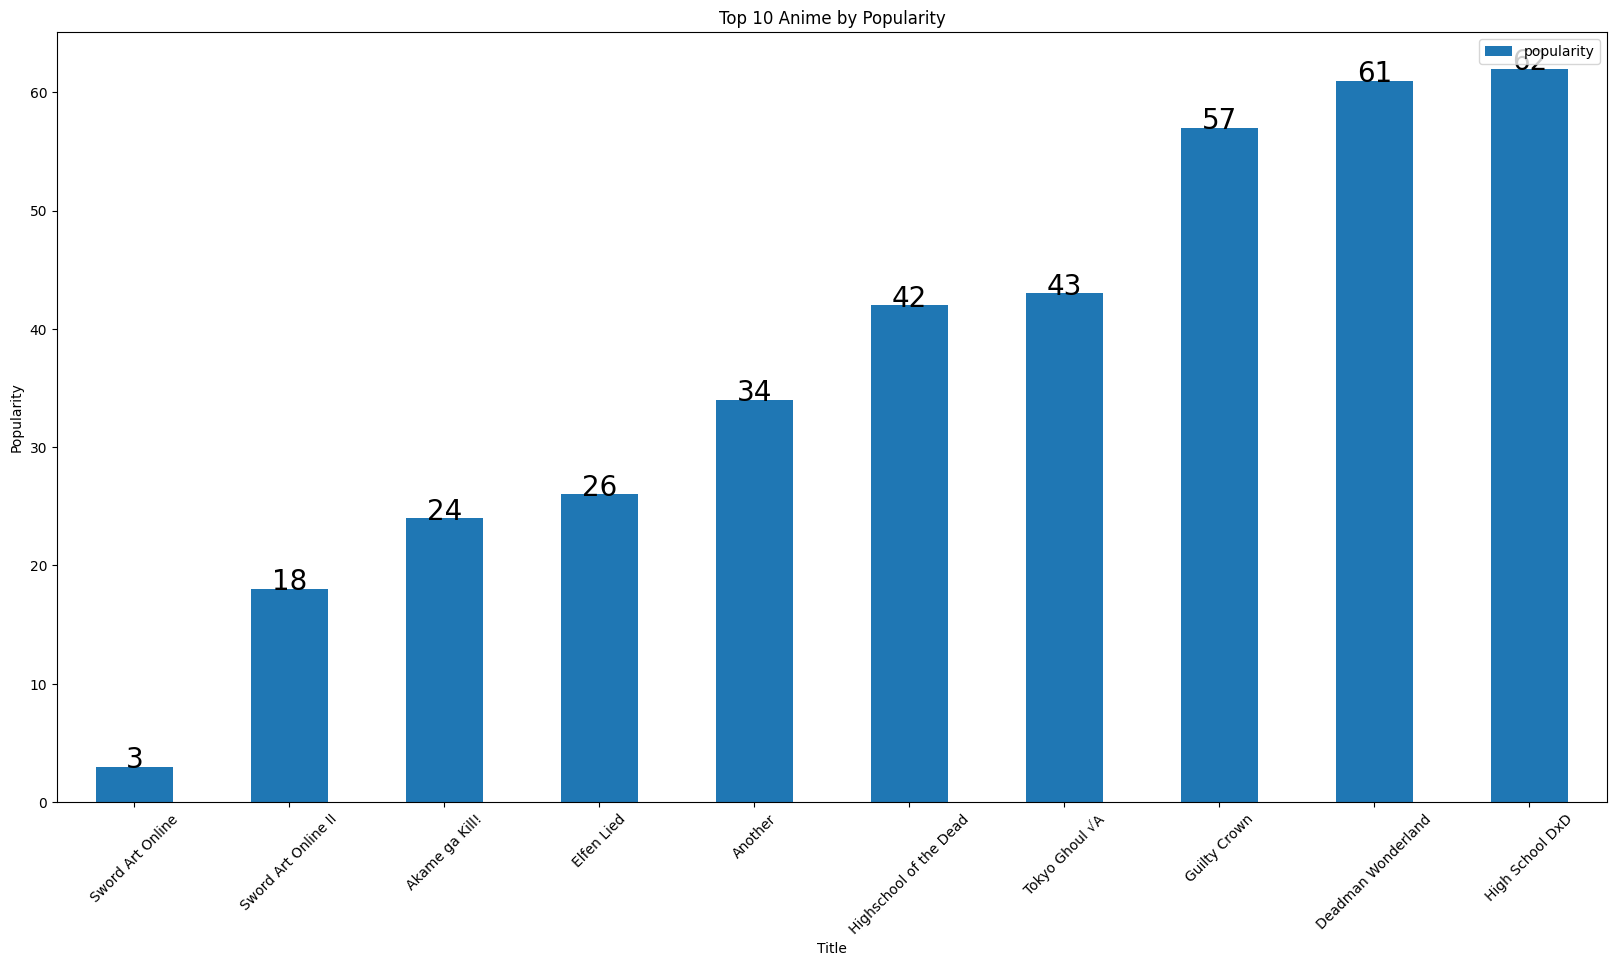

In [109]:
ax = df1.plot(kind='bar', x='title', y='popularity', rot=45, figsize=(20,10), width=0.5)
plt.title('Top 10 Anime by Popularity')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.set_cmap('Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

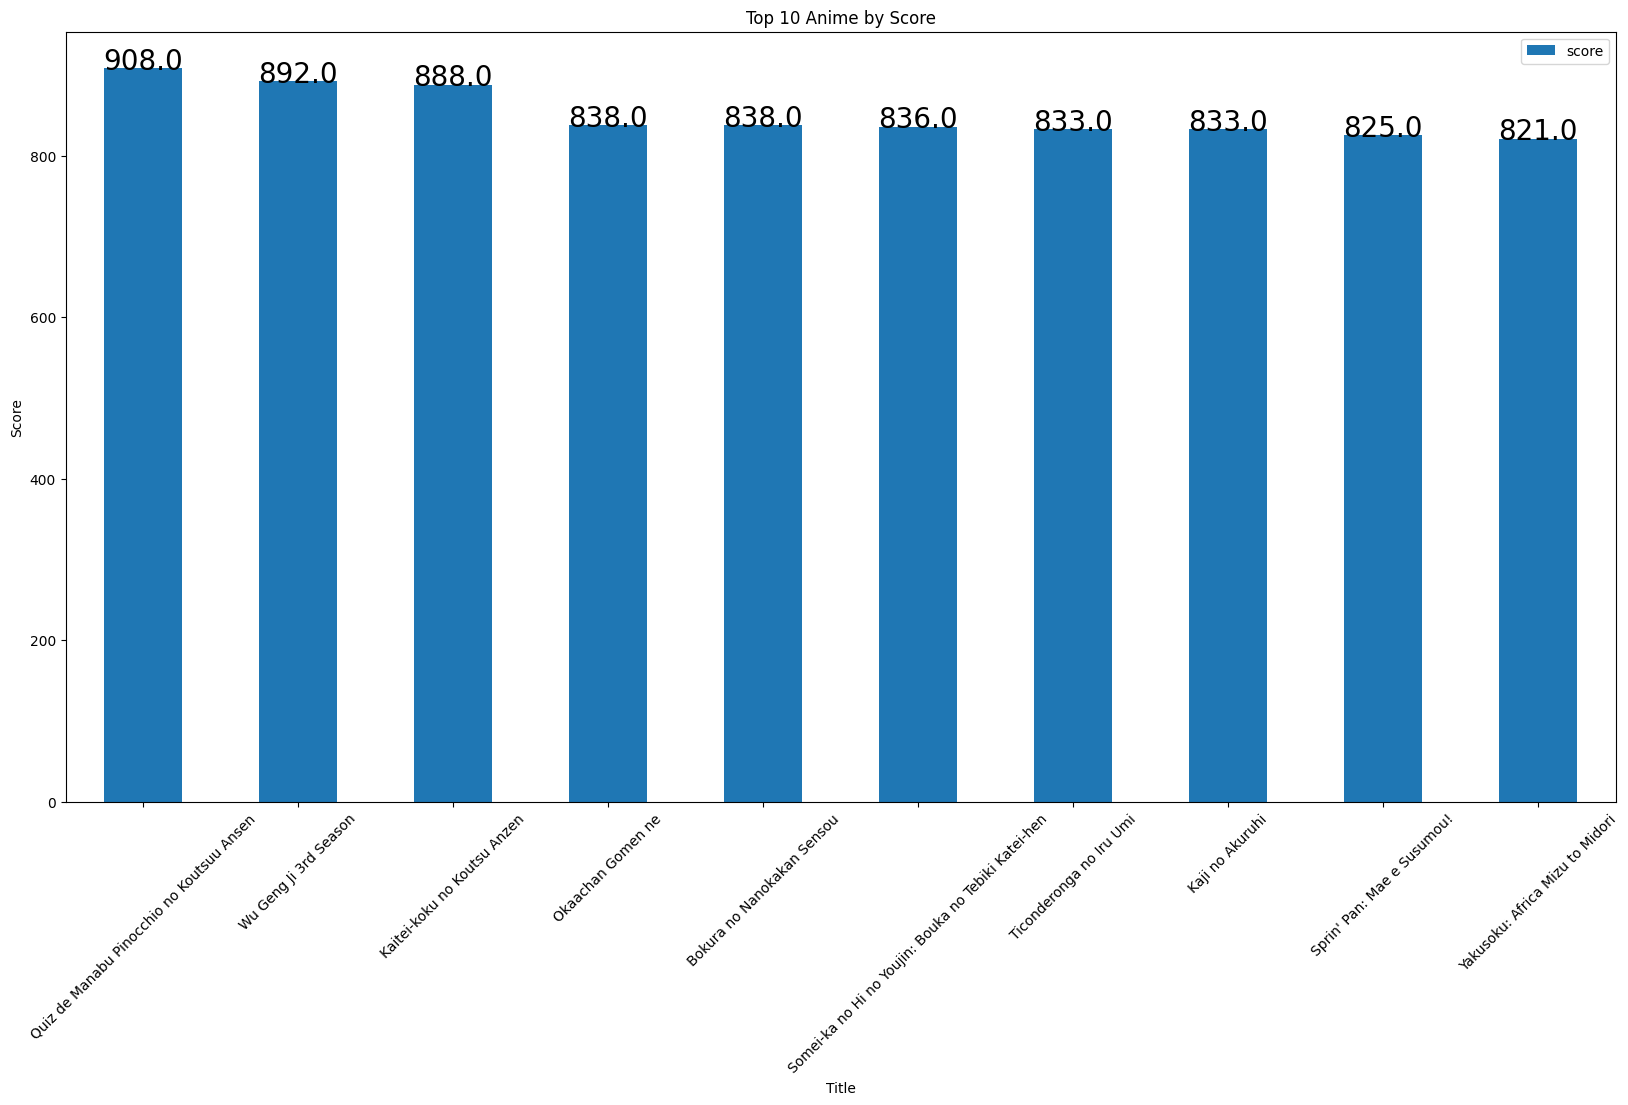

In [110]:
ax = df2.plot(kind='bar', x='title', y='score', rot=45, figsize=(20,10), width=0.5)
plt.title('Top 10 Anime by Score')
plt.xlabel('Title')
plt.ylabel('Score')
plt.set_cmap('Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

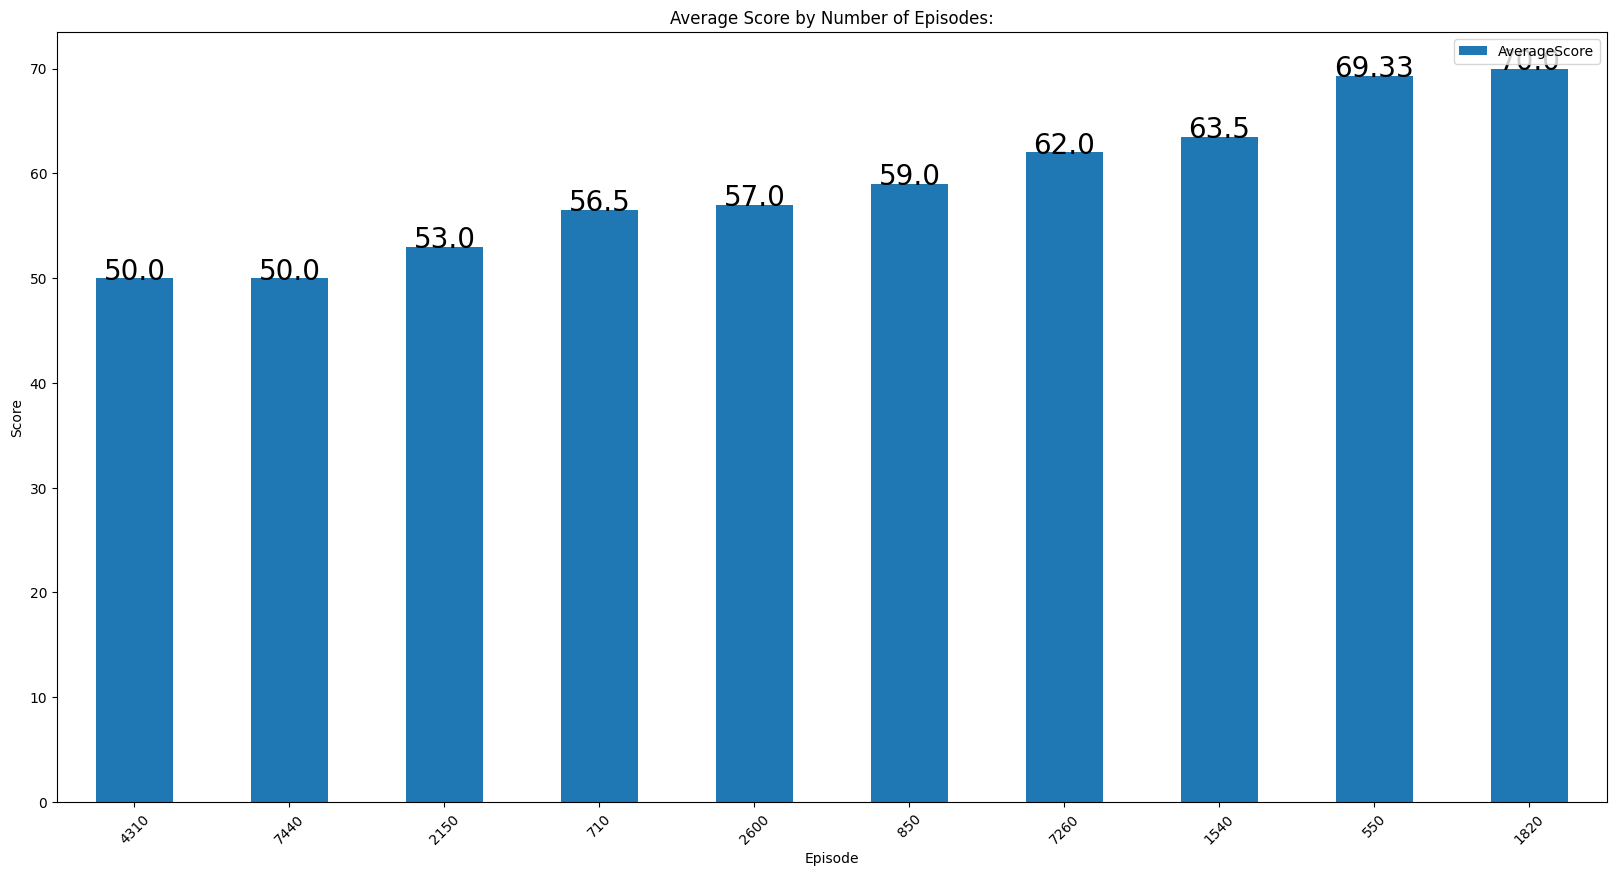

In [111]:
df3['AverageScore']=df3['AverageScore'].round(2)
df3['episodes'] = df3['episodes'].astype(int)
ax = df3.plot(kind='bar', x='episodes', y='AverageScore', rot=45, figsize=(20,10), width=0.5)
plt.title('Average Score by Number of Episodes:')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.set_cmap('Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

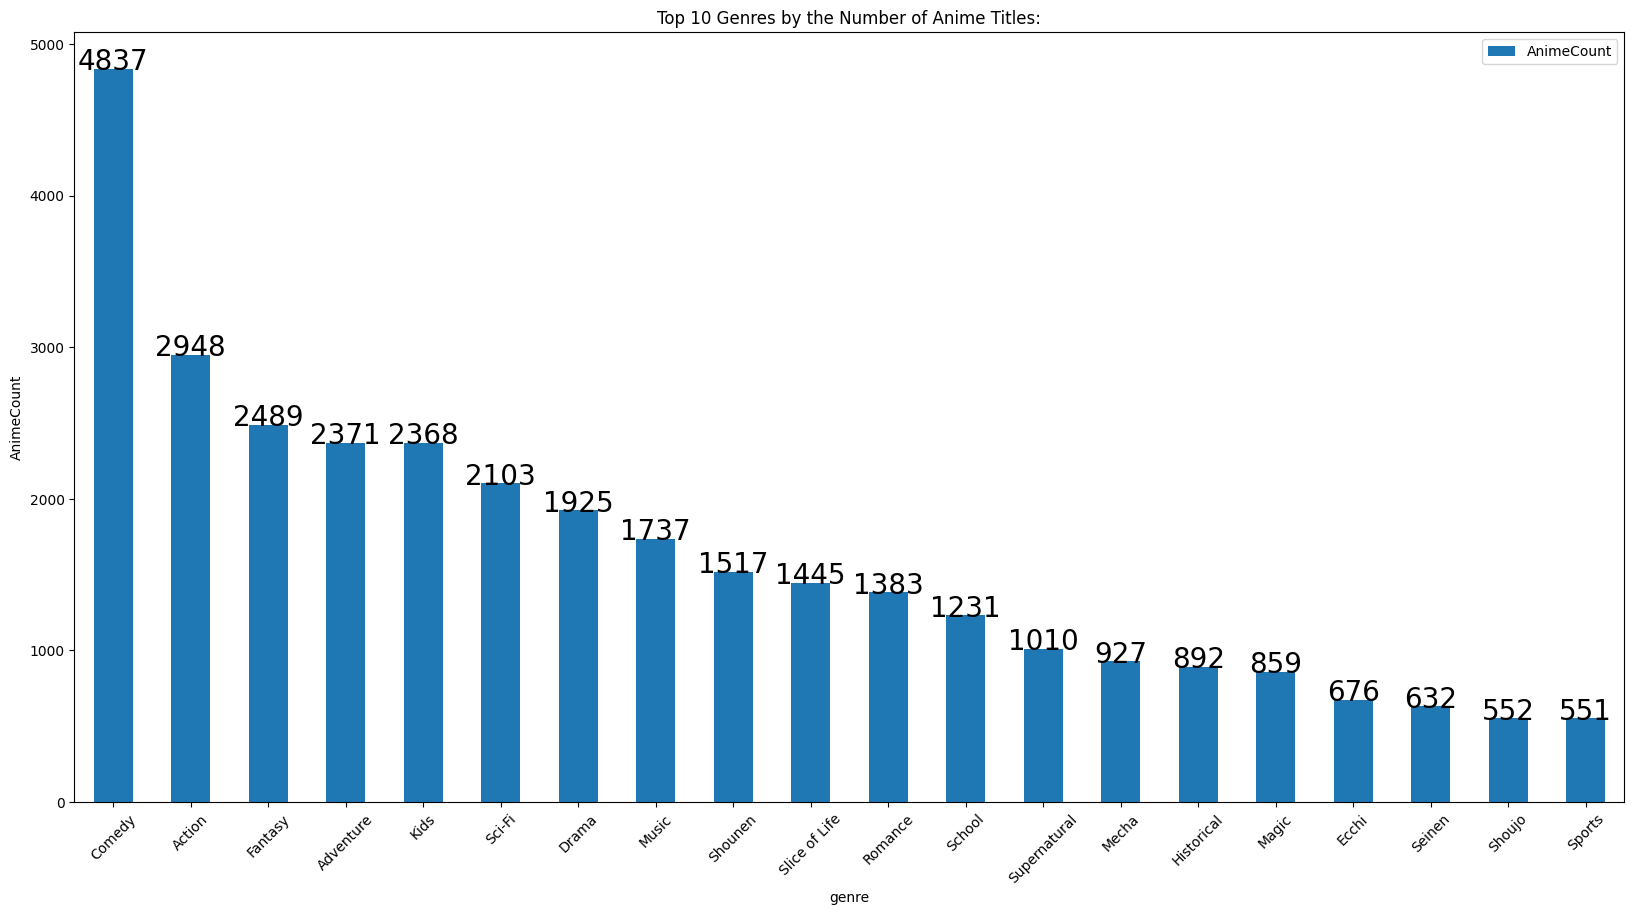

In [112]:
ax = df4.plot(kind='bar', x='genre', y='AnimeCount', rot=45, figsize=(20,10), width=0.5)
plt.title('Top 10 Genres by the Number of Anime Titles:')
plt.xlabel('genre')
plt.ylabel('AnimeCount')
plt.set_cmap('Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

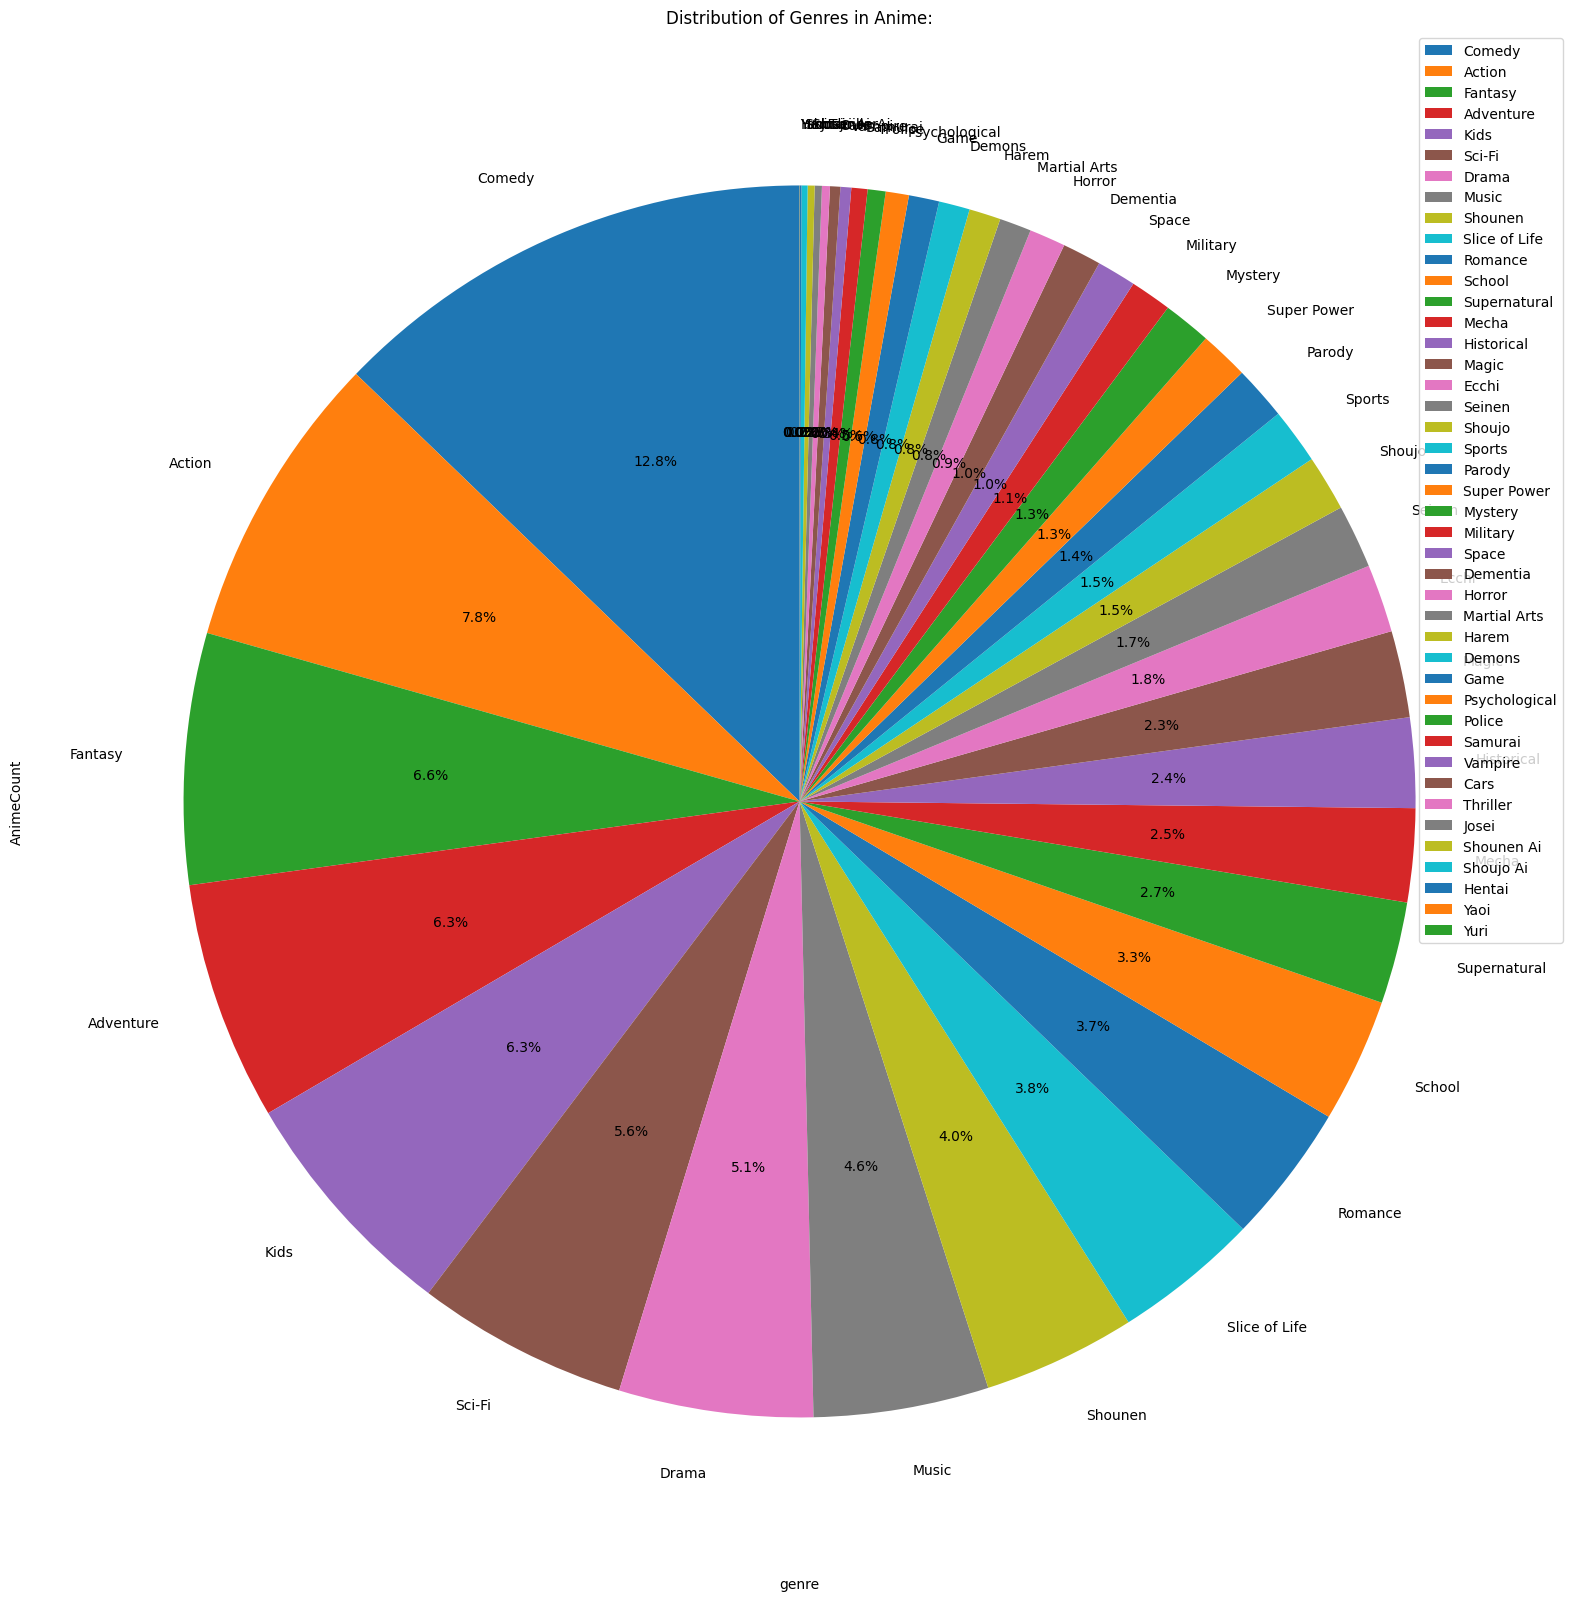

In [121]:
ax = df5.plot(kind='pie', y='AnimeCount', labels=df5['genre'], figsize=(20,20), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genres in Anime:')
plt.xlabel('genre')
plt.ylabel('AnimeCount')
plt.set_cmap('Set2')

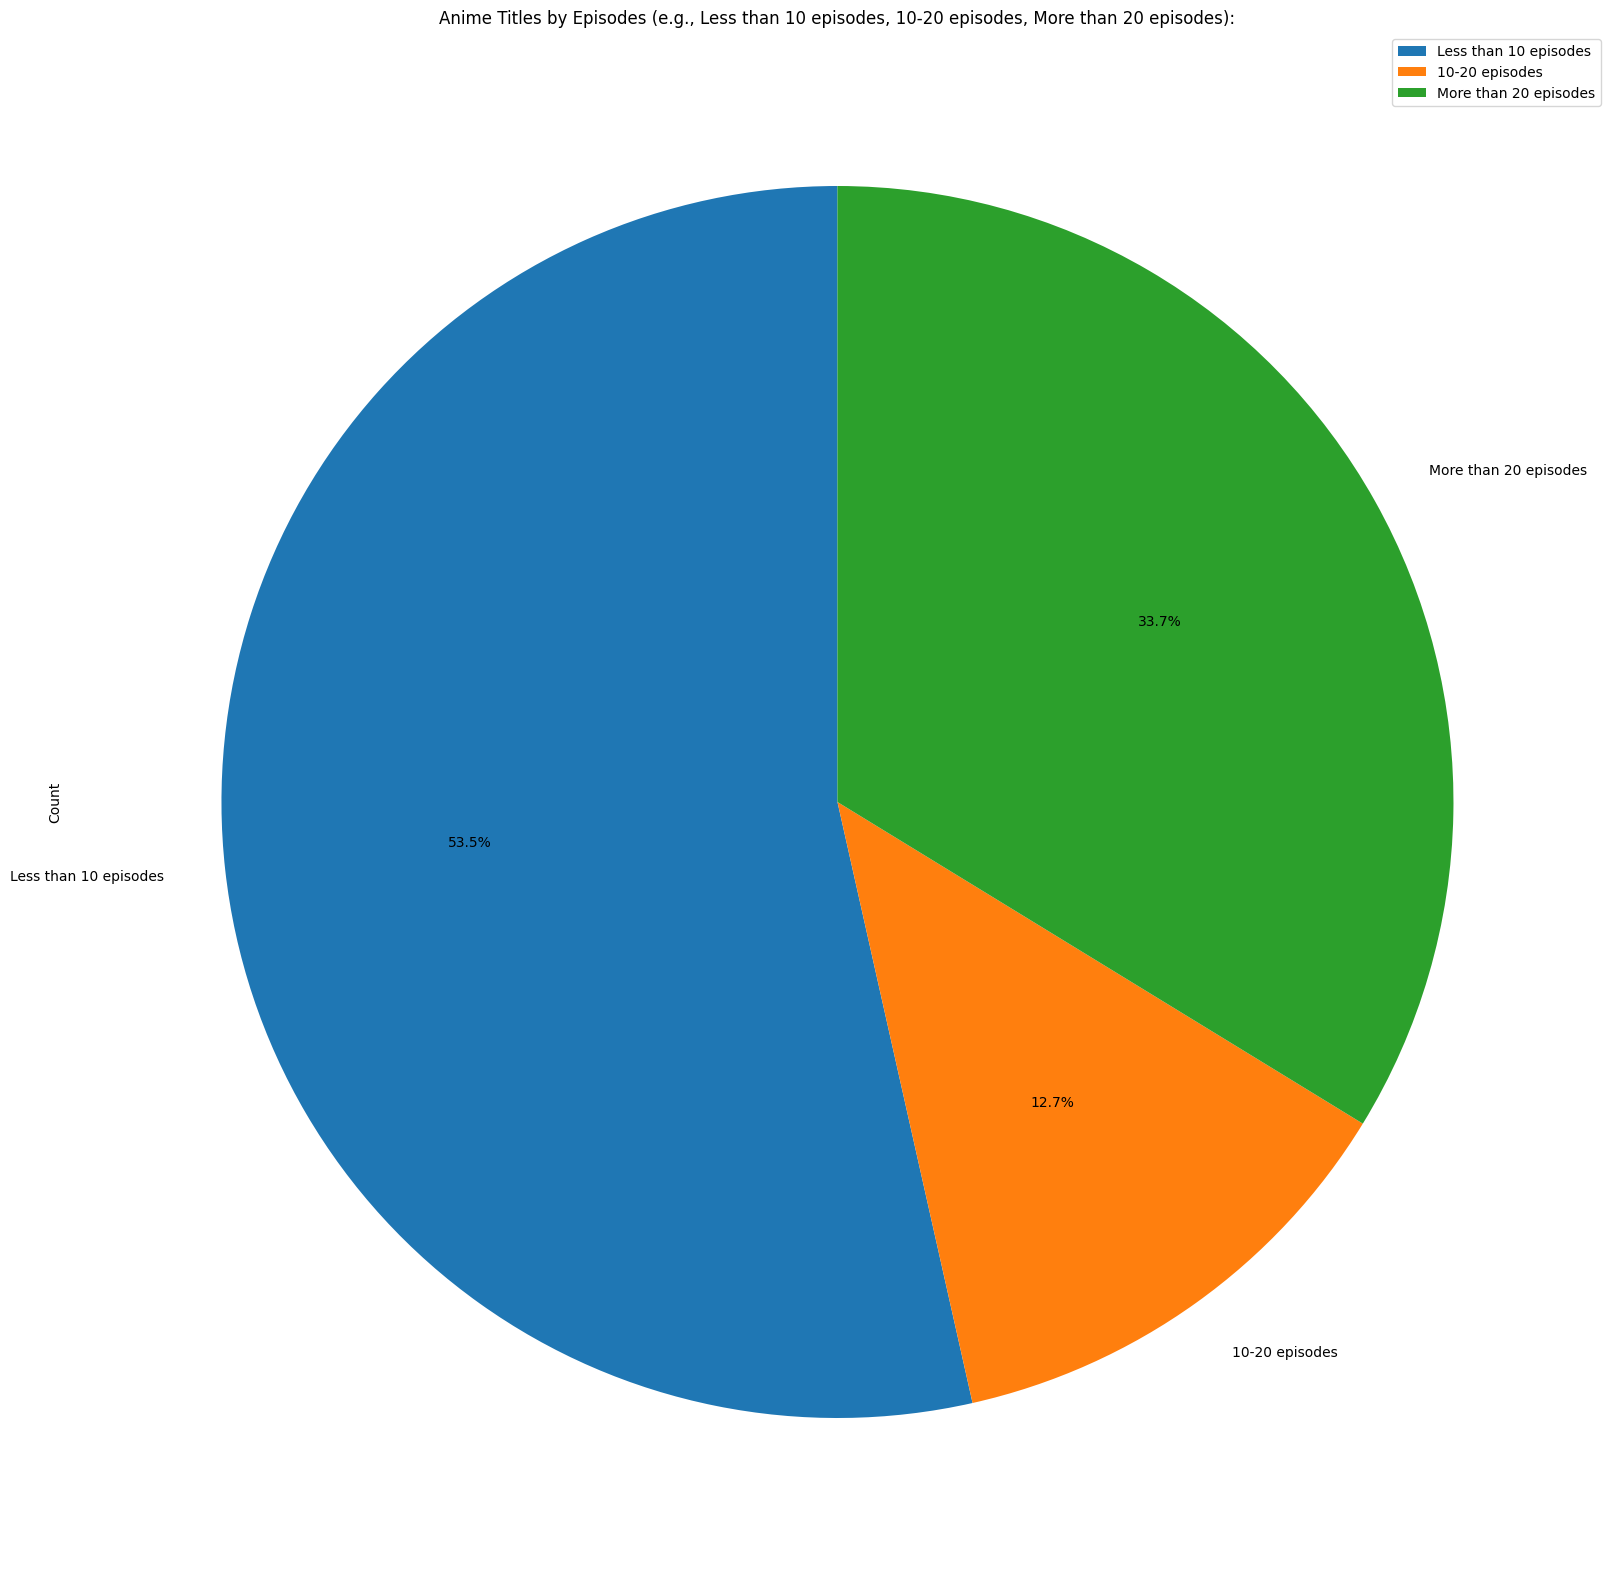

In [155]:
ax = df6.plot(kind='pie', y='Count', labels=df6['EpisodeRange'], figsize=(20,20), autopct='%1.1f%%', startangle=90)
plt.title('Anime Titles by Episodes (e.g., Less than 10 episodes, 10-20 episodes, More than 20 episodes):')
plt.ylabel('Count')
plt.set_cmap('Set2')

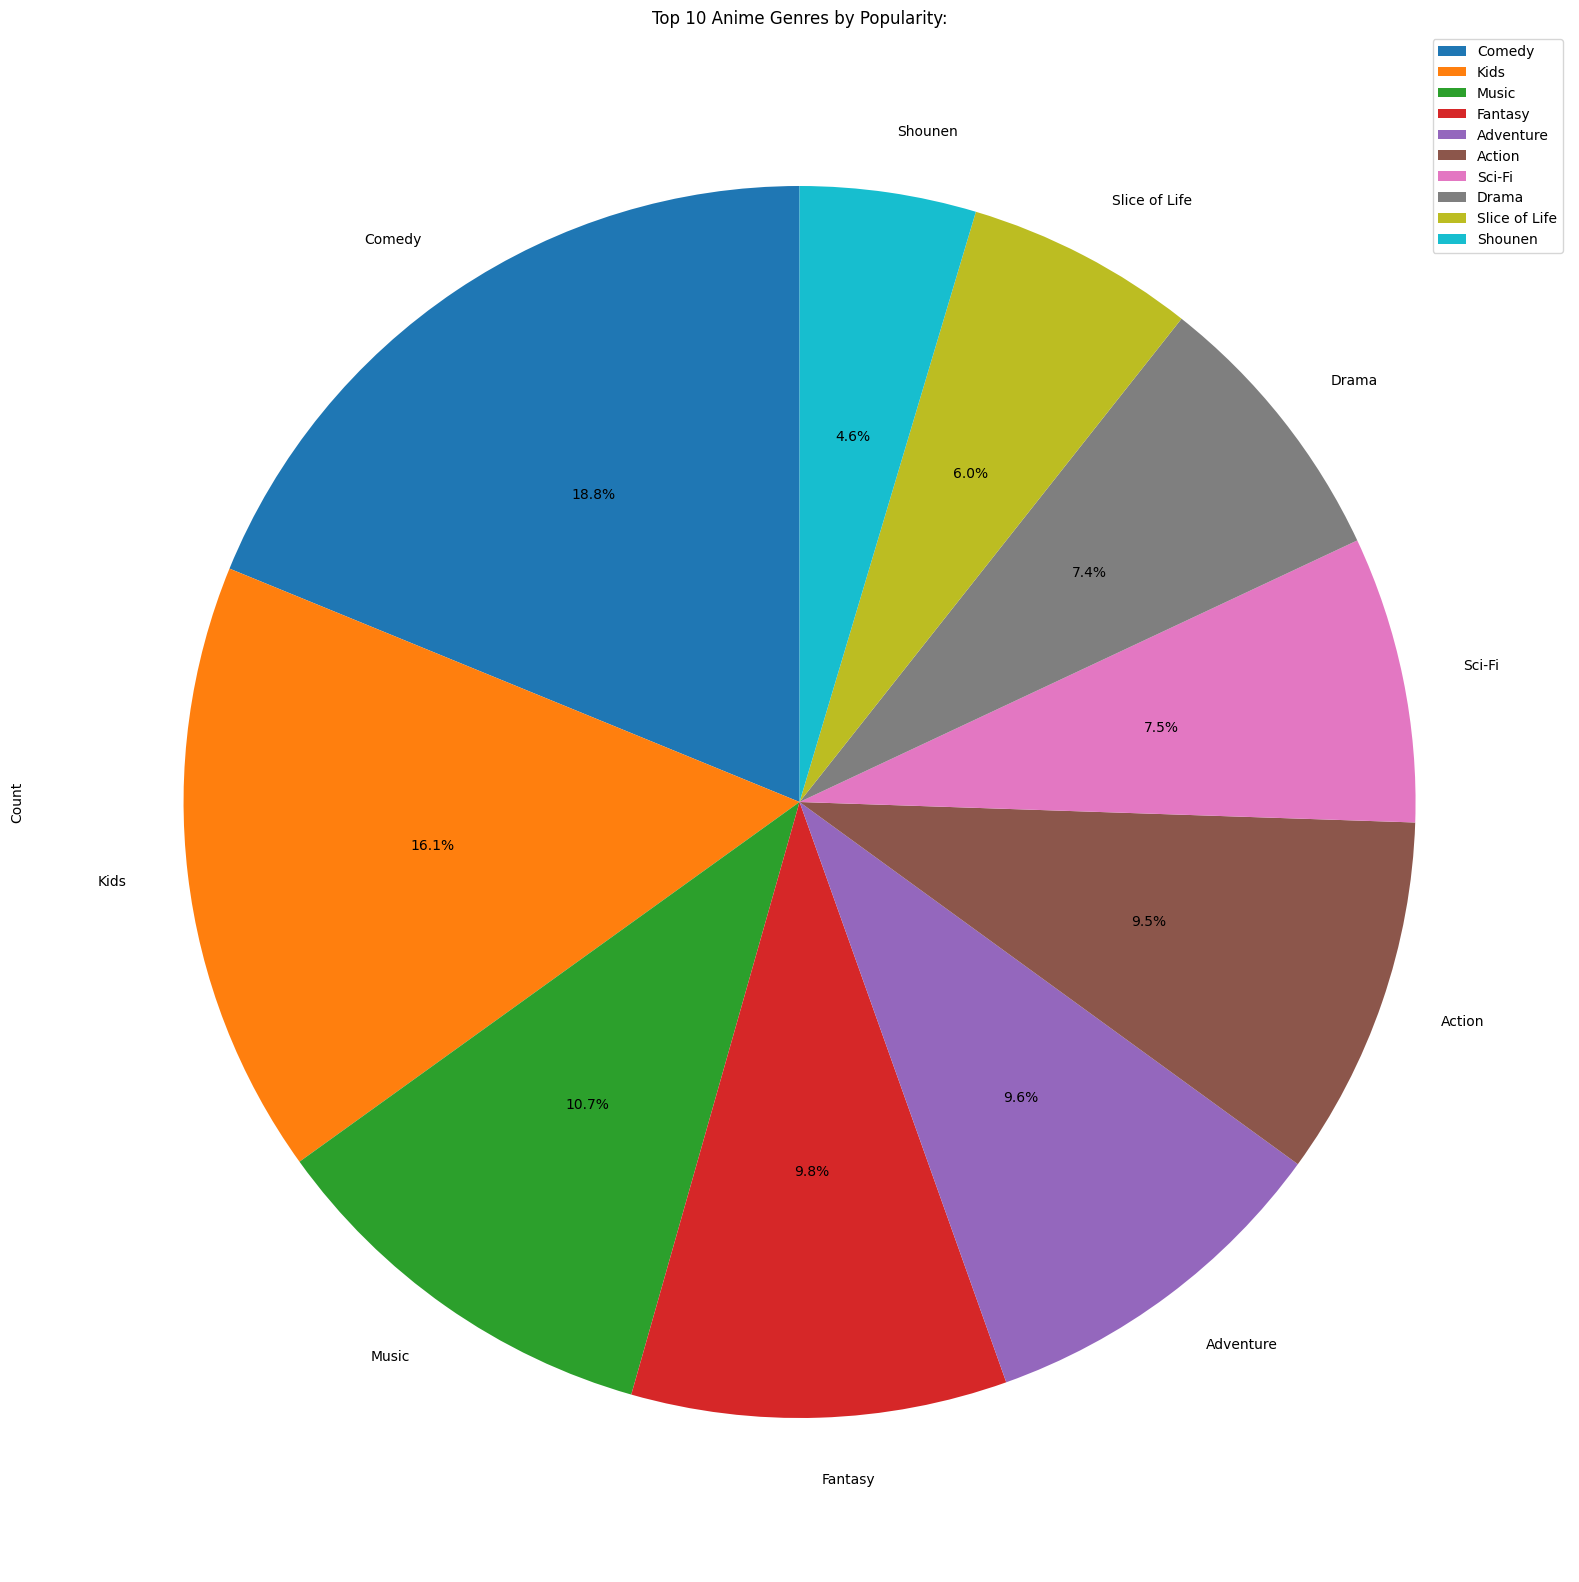

In [135]:
ax = df7.plot(kind='pie', y='TotalPopularity', labels=df7['genre'], figsize=(20,20), autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Anime Genres by Popularity:')
plt.ylabel('Count')
plt.set_cmap('Set2')

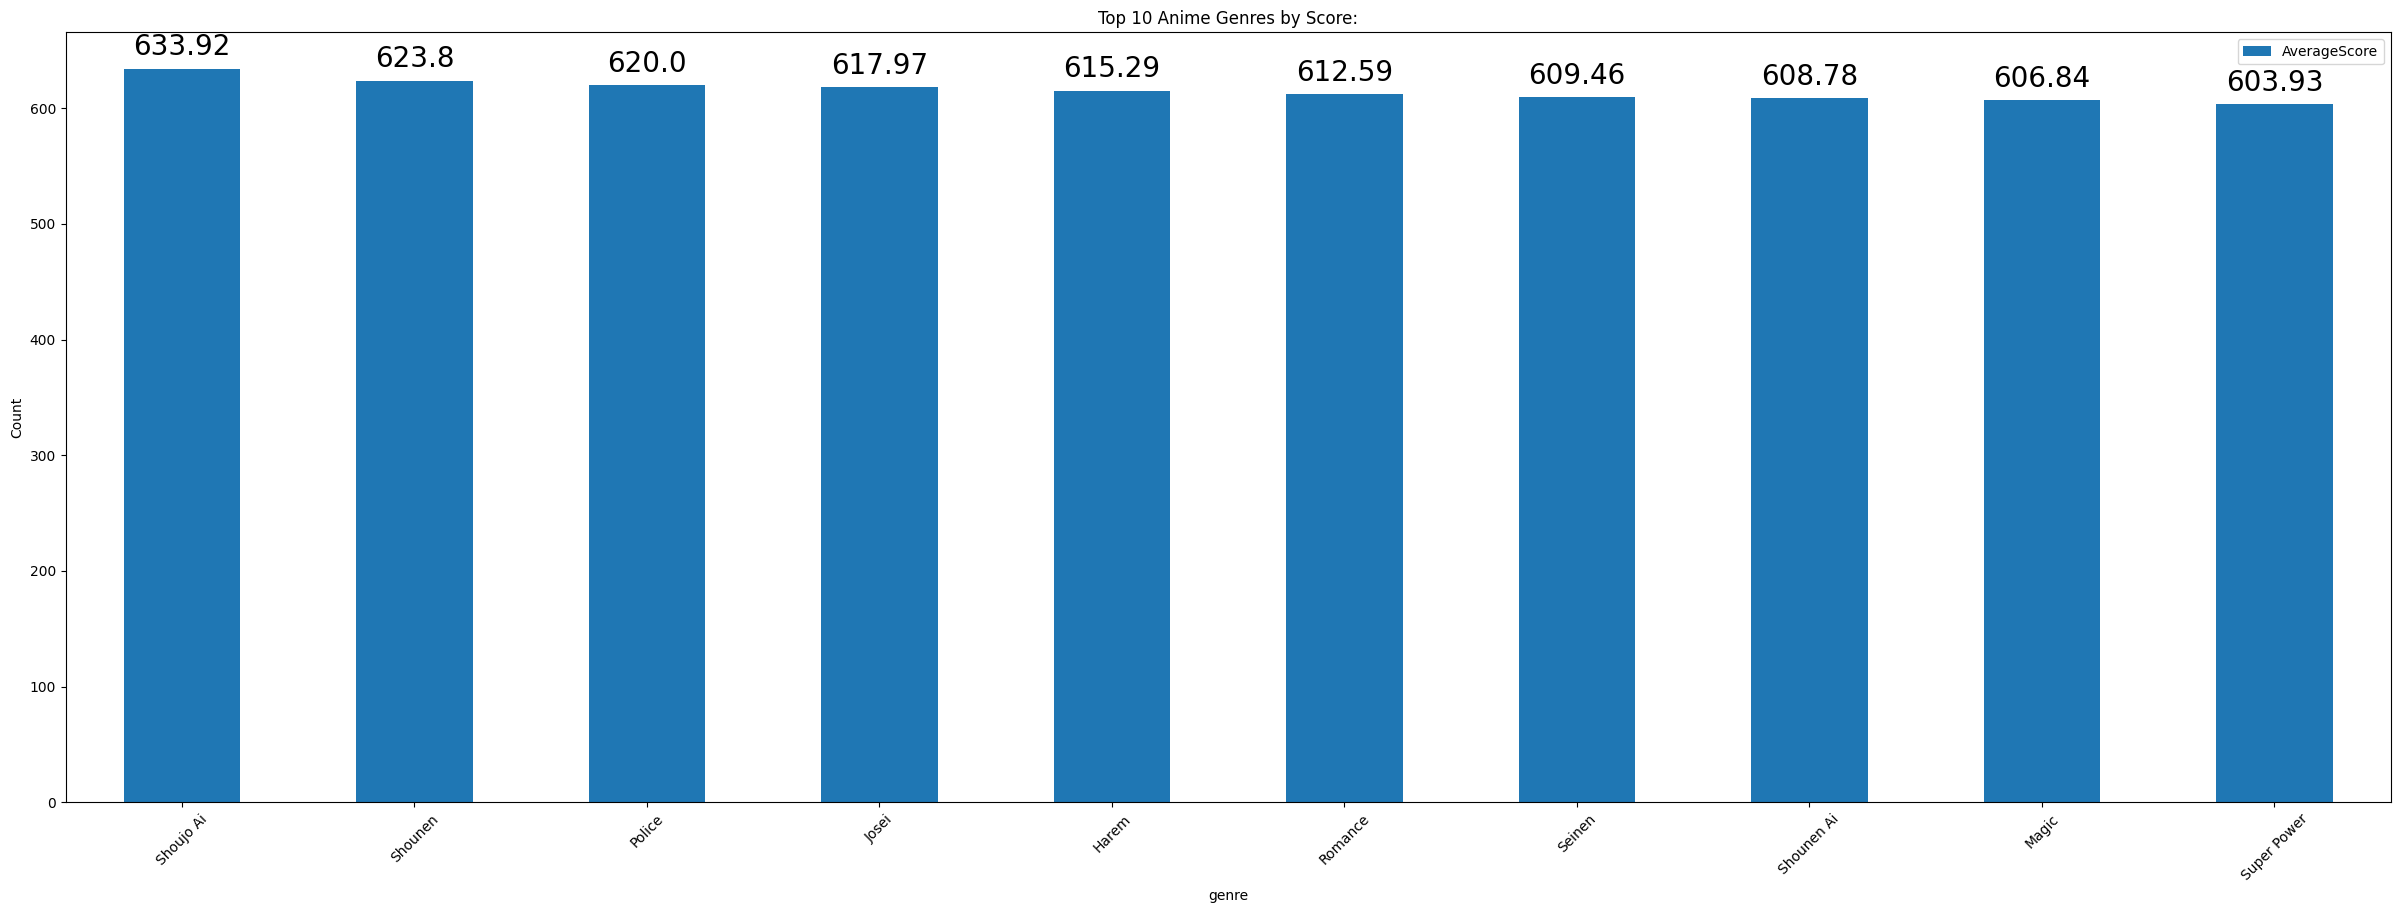

In [149]:
df8['AverageScore']=df8['AverageScore'].round(2)
ax = df8.plot(kind='bar', x='genre', y='AverageScore', rot=45, figsize=(30,10), width=0.5)
plt.title('Top 10 Anime Genres by Score:')
plt.ylabel('Count')
plt.set_cmap('Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()*1.02),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')